In [2]:
import xarray as xr
#import imktk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from astropy.timeseries import LombScargle
from astropy.time import Time
import cartopy.crs as ccrs
import netCDF4 as nc

In [ ]:
# Open the netCDF file
ds = xr.open_dataset("ancistrus_2_test10a.nc")
variable_names = list(ds.data_vars)

# Access the data as an xarray DataArray
data = ds[variable_names[1]]


In [ ]:
climatology = data.groupby("time.month").mean("time")
anomalies = data.groupby("time.month") - climatology

In [ ]:
anomalies

In [ ]:
plt.show()

In [ ]:
anomalies

In [ ]:
velocity_slice = anomalies.sel(alt="22", method="nearest")

In [ ]:
np.multiply(np.sign(velocity_slice),np.log(np.abs(velocity_slice))).T.plot(vmin = -17, vmax = 17)

In [ ]:
np.multiply(np.sign(data.sel(alt="22", method="nearest")),np.log(np.abs(data.sel(alt="22", method="nearest")))).T.plot()

In [ ]:

def pastel_diverging_cmap(n_colors=256):
    color_array = np.array([[0.5, 0.5, 0.5], [0.1, 0.1, 0.9], [0.6, 0.2, 0.2]])
    return mcolors.LinearSegmentedColormap.from_list('pastel_diverging', color_array, N=n_colors)

cmap = pastel_diverging_cmap()


In [ ]:
velocity_slice.T.plot(levels=20,vmin = -0.0001, vmax = 0.0001)

In [ ]:
data.sel(alt="22", method="nearest").T.plot(levels=20)#,vmin = -0.001, vmax = 0.001)

In [ ]:
frequency, power = LombScargle(Time(velocity_slice.time.astype(str)), velocity_slice.sel(lat="0", method="nearest").data).autopower()

In [ ]:
plt.plot(frequency, power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

In [ ]:
velocity_slice.sel(lat="0", method="nearest").data

In [ ]:
max_power_index = np.argmax(power)
peak_frequency = frequency[max_power_index]

In [ ]:
period = 1.0 / peak_frequency

In [ ]:
print('Period:', period, 'months')

In [ ]:
ch4=xr.open_dataset("/Users/tobias/Downloads/de9e6ee4-c34a-11ed-a488-0050569abf1e/MIPAS-E_IMK.200207.V8H_CH4_61.nc")


In [ ]:
target = ch4['target']
latitude = ch4['latitude']
longitude = ch4['longitude']
# Create a new figure and axis object using matplotlib
fig, ax = plt.subplots()

# Create a scatter plot of latitude and longitude against target
ax.scatter(longitude, latitude, c=target)

# Add axis labels and a colorbar
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.colorbar(label='Target')

In [ ]:
ch4variable_names = list(ch4.data_vars)

In [ ]:
ch4variable_names

In [ ]:
ch4

In [ ]:
plt.show()

In [ ]:
lat_points = ch4.latitude
lon_points = ch4.longitude
alt_points = ch4.altitude

In [ ]:
data_points = ch4.target.interp(x=lon_points, y=lat_points, z=alt_points, method='linear')

In [ ]:
data_points = ch4.target.interp(lat=lat_points, lon=lon_points)

In [ ]:
lat_traj = ch4.latitude.data
lon_traj = ch4.longitude.data
alt_traj = ch4.altitude.data
traj_coords = xr.Dataset(
    {
        "latitude": (("point",), lat_traj),
        "longitude": (("point",), lon_traj),
        "altitude": (("point",), alt_traj),
    }
)

In [ ]:
ch4.latitude.data

In [ ]:
lat_traj = np.repeat(ch4.latitude.data[:, np.newaxis], n_points, axis=1)
lon_traj = np.repeat(ch4.longitude.data[:, np.newaxis], n_points, axis=1)
alt_traj = np.zeros((n_traj_points, n_points, 2))
alt_traj[:, :, 0] = np.repeat(ch4.pressure.data[:, np.newaxis], n_points, axis=1)
alt_traj[:, :, 1] = np.repeat(ch4.altitude.data[:, np.newaxis], n_points, axis=1)

In [ ]:

# Load the netCDF file
ds = xr.open_dataset("MIPAS-E_IMK.201201.V8R_CH4_762.nc")

# Extract the variables of interest
target = ds['target']
latitude = ds['latitude']
longitude = ds['longitude']
altitude = ds['altitude']

# Choose a height level (in meters)
height = 10.

# Find the nearest altitude level
alt_idx = np.abs(altitude - height).argmin()
alt_idx = np.argmin(np.abs(altitude - height)) 
# Extract the target values at the chosen altitude and time
ch4 = target[alt_idx]

# Set up a map projection
proj = ccrs.PlateCarree()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6), subplot_kw=dict(projection=proj))

# Add coastlines, countries, and gridlines
ax.coastlines(linewidth=0.5)
ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Convert latitude and longitude to map coordinates
x, y = np.meshgrid(longitude, latitude)

# Plot the ch4 data on the map
cs = ax.pcolormesh(x, y, ch4, cmap='jet', transform=ccrs.PlateCarree())

# Add a color bar
cbar = plt.colorbar(cs, orientation='vertical', shrink=0.5)
cbar.set_label('CH4')

# Add a title
plt.title(f'CH4 concentration at {height} meters')

# Show the plot
plt.show()


In [ ]:
!pip install Cartopy

In [ ]:
ds.altitude.sel(altgrid='10.', method='nearest')

In [ ]:
alt_idx

In [ ]:
4231*84

In [ ]:
ds.altitude

In [ ]:
ds2 = xr.open_dataset("ancistrus_2_test10a.nc")

In [ ]:
ds2

In [ ]:

ch4=nc.Dataset("/Users/tobias/Downloads/de9e6ee4-c34a-11ed-a488-0050569abf1e/MIPAS-E_IMK.200207.V8H_CH4_61.nc")


In [ ]:
ch4

In [ ]:
data = ch4.variables['target']

In [ ]:
data

In [ ]:
plt.contour(data)

In [3]:
ds = xr.open_dataset("MIPAS-E_IMK.200502.V8R_CH4_261.nc")

In [6]:
ds.sel(altitude="10", method = "nearest")

<xarray.Dataset>
Dimensions:             (time: 9413, scangrid: 27)
Coordinates:
  * time                (time) datetime64[ns] 2005-02-07T06:55:33.000026624 ....
    altitude            float32 10.0
Dimensions without coordinates: scangrid
Data variables: (12/24)
    sub_id              (time) |S33 ...
    geo_id              (time) |S33 ...
    latitude            (time) float32 ...
    longitude           (time) float32 ...
    sza                 (time) float32 ...
    dof                 (time) float32 ...
    ...                  ...
    vr_row              (time) float32 ...
    vr_akdiag           (time) float32 ...
    random_error        (time) float32 ...
    systematic_error    (time) float32 ...
    total_error         (time) float32 ...
    diagnostics_id      (time) |S33 ...
Attributes: (12/17)
    title:                                     MIPAS CH4 data, processed at K...
    retrieval_target_name:                     CH4
    retrieval_in_logarithmic_parameter_space:  FALSE
    use_data_only_in_altitude_range:           5-70 km
    restrict_altitude_range:                   use visibility == 1 and akm_di...
    platform:                                  SATELLITE
    ...                                        ...
    address:                                   H.-v.-Helmholtz-Platz 1, D-763...
    author:                                    Michael Kiefer
    email:                                     michael.kiefer@kit.edu
    data_format_version:                       data format version 0.3.0
    Conventions:                               CF-1.6
    file_version:                              FV-1.0

In [7]:
ds


<xarray.Dataset>
Dimensions:             (time: 9413, altitude: 73, scangrid: 27)
Coordinates:
  * time                (time) datetime64[ns] 2005-02-07T06:55:33.000026624 ....
  * altitude            (altitude) float32 0.0 4.0 5.0 6.0 ... 90.0 100.0 120.0
Dimensions without coordinates: scangrid
Data variables: (12/24)
    sub_id              (time) |S33 ...
    geo_id              (time) |S33 ...
    latitude            (time) float32 ...
    longitude           (time) float32 ...
    sza                 (time) float32 ...
    dof                 (time) float32 ...
    ...                  ...
    vr_row              (altitude, time) float32 ...
    vr_akdiag           (altitude, time) float32 ...
    random_error        (altitude, time) float32 ...
    systematic_error    (altitude, time) float32 ...
    total_error         (altitude, time) float32 ...
    diagnostics_id      (time) |S33 ...
Attributes: (12/17)
    title:                                     MIPAS CH4 data, processed at K...
    retrieval_target_name:                     CH4
    retrieval_in_logarithmic_parameter_space:  FALSE
    use_data_only_in_altitude_range:           5-70 km
    restrict_altitude_range:                   use visibility == 1 and akm_di...
    platform:                                  SATELLITE
    ...                                        ...
    address:                                   H.-v.-Helmholtz-Platz 1, D-763...
    author:                                    Michael Kiefer
    email:                                     michael.kiefer@kit.edu
    data_format_version:                       data format version 0.3.0
    Conventions:                               CF-1.6
    file_version:                              FV-1.0

In [10]:
ds = xr.open_dataset("MIPAS-E_IMK.200502.V8R_CH4_261.nc")

# Group data by month and altitude
ds_monthly = ds.target.groupby(['time', 'altitude']).mean(dim='time')

# Select target data variable
target_monthly = ds_monthly.target

# Print target data for each month and altitude
print(target_monthly)

TypeError: `group` must be an xarray.DataArray or the name of an xarray variable or dimension. Received ['time', 'altitude'] instead.

In [23]:
ds.target.groupby(['altitude', 'time'])

TypeError: `group` must be an xarray.DataArray or the name of an xarray variable or dimension. Received ['altitude', 'time'] instead.

In [27]:
grouped_by_altitude = ds.target.groupby('altitude')
grouped_by_month = ds.target.groupby('time.month')

# Compute mean CH4 target for each altitude and month
#ch4_monthly = grouped_by_altitude.apply(lambda x: grouped_by_month.apply(lambda y: x[y==y].mean()))
ch4_monthly = grouped_by_altitude.apply(lambda x: grouped_by_month.apply(lambda y: x.where(y==y).mean()))

# Print CH4 target data for each month and altitude
print(ch4_monthly)

<xarray.DataArray 'target' (altitude: 73, month: 1)>
array([[ 1.77863586e+00],
       [ 1.77863586e+00],
       [ 1.77863586e+00],
       [ 1.77866149e+00],
       [ 1.77891839e+00],
       [ 1.78065145e+00],
       [ 1.78182113e+00],
       [ 1.77596545e+00],
       [ 1.77087796e+00],
       [ 1.77569604e+00],
       [ 1.76523888e+00],
       [ 1.73846245e+00],
       [ 1.71911883e+00],
       [ 1.69408715e+00],
       [ 1.65775561e+00],
       [ 1.59424925e+00],
       [ 1.49506915e+00],
       [ 1.38968432e+00],
       [ 1.30033851e+00],
       [ 1.23692775e+00],
...
       [ 2.07206309e-01],
       [ 1.98627025e-01],
       [ 1.91431344e-01],
       [ 1.85292453e-01],
       [ 1.79563761e-01],
       [ 1.73771471e-01],
       [ 1.67279705e-01],
       [ 1.60268888e-01],
       [ 1.52534291e-01],
       [ 1.44744188e-01],
       [ 1.37045145e-01],
       [ 1.29681602e-01],
       [ 1.22867331e-01],
       [ 1.16541684e-01],
       [ 1.10409185e-01],
       [ 3.45911365e-04],
       

In [28]:
ch4_monthly

<xarray.DataArray 'target' (altitude: 73, month: 1)>
array([[ 1.77863586e+00],
       [ 1.77863586e+00],
       [ 1.77863586e+00],
       [ 1.77866149e+00],
       [ 1.77891839e+00],
       [ 1.78065145e+00],
       [ 1.78182113e+00],
       [ 1.77596545e+00],
       [ 1.77087796e+00],
       [ 1.77569604e+00],
       [ 1.76523888e+00],
       [ 1.73846245e+00],
       [ 1.71911883e+00],
       [ 1.69408715e+00],
       [ 1.65775561e+00],
       [ 1.59424925e+00],
       [ 1.49506915e+00],
       [ 1.38968432e+00],
       [ 1.30033851e+00],
       [ 1.23692775e+00],
...
       [ 2.07206309e-01],
       [ 1.98627025e-01],
       [ 1.91431344e-01],
       [ 1.85292453e-01],
       [ 1.79563761e-01],
       [ 1.73771471e-01],
       [ 1.67279705e-01],
       [ 1.60268888e-01],
       [ 1.52534291e-01],
       [ 1.44744188e-01],
       [ 1.37045145e-01],
       [ 1.29681602e-01],
       [ 1.22867331e-01],
       [ 1.16541684e-01],
       [ 1.10409185e-01],
       [ 3.45911365e-04],
       [-3.03935562e-03],
       [-3.19685001e-04],
       [-7.00265355e-06],
       [ 4.98691804e-07]], dtype=float32)
Coordinates:
  * month     (month) int64 2
  * altitude  (altitude) float32 0.0 4.0 5.0 6.0 7.0 ... 80.0 90.0 100.0 120.0

In [57]:
import numpy as np
from scipy.interpolate import griddata

# assume you have the following arrays:
# x = array of longitudes for the target data
# y = array of latitudes for the target data
# z = array of ch4 target values for the target data
# lats = array of latitudes for the interpolation points
# longs = array of longitudes for the interpolation points
ds = xr.open_dataset("MIPAS-E_IMK.200502.V8R_CH4_261.nc")
x = ds.longitude.values
y = ds.latitude.values
z = ds.target.values[0,:]
lats = np.linspace(-90, 90, 19)
longs = np.linspace(-180, 180, 37)


# create a grid of points to interpolate at
xi, yi = np.meshgrid(longs, lats)

# interpolate the target values at the grid points
zi = griddata((x, y), z, (xi, yi), method='linear')

# where there are no ch4 target points, set the interpolated value to NaN
zi[np.isnan(zi)] = np.nan

ch4 = zi

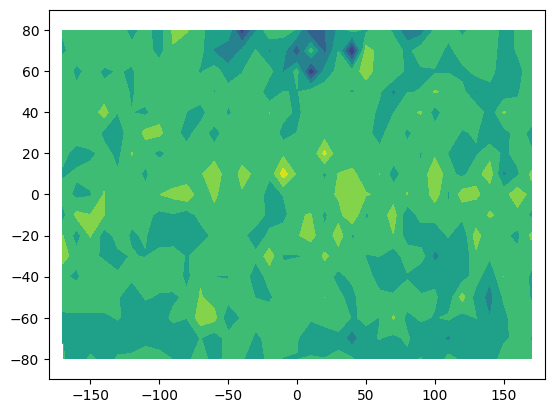

In [63]:
plt.contourf(xi,yi,zi)

In [56]:
print(x.shape)
print(y.shape)
print(z.shape)

(9413,)
(9413,)
(73, 9413)


In [64]:
import numpy as np
from scipy.interpolate import griddata

# assume you have the following arrays:
# lat = array of latitudes for the target data
# lon = array of longitudes for the target data
# ch4 = array of ch4 target values for the target data
# lat_interp = array of latitudes for the interpolation points
# lon_interp = array of longitudes for the interpolation points
ds = xr.open_dataset("MIPAS-E_IMK.200502.V8R_CH4_261.nc")
lat = ds.latitude.values
lon = ds.longitude.values
ch4 = ds.target.values[0, :]  # select the CH4 values for the desired altitude level
lat_interp = np.linspace(-90, 90, 19)
lon_interp = np.linspace(-180, 180, 37)

# create a grid of points to interpolate at
xi, yi = np.meshgrid(lon_interp, lat_interp)

# interpolate the target values at the grid points
zi = griddata((lon.ravel(), lat.ravel()), ch4.ravel(), (xi, yi), method='linear')

# where there are no ch4 target points, set the interpolated value to NaN
zi[np.isnan(zi)] = np.nan

# reshape the interpolated values to a 2D array
ch4_interp = zi.reshape(len(lat_interp), len(lon_interp))


TypeError: Input z must be 2D, not 3D

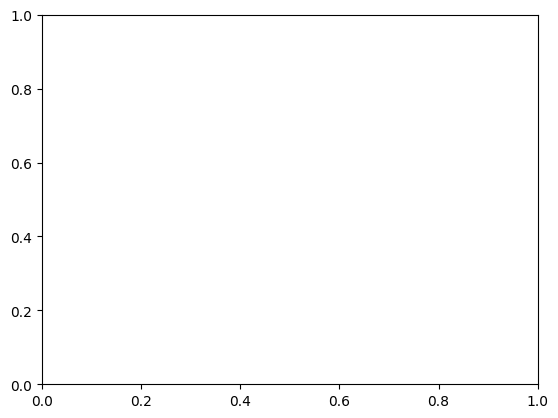

In [68]:
plt.contourf(ch4_interp)

In [79]:
import numpy as np
from scipy.interpolate import griddata

# assume you have the following arrays:
# lat = array of latitudes for the target data
# lon = array of longitudes for the target data
# ch4 = array of ch4 target values for the target data
# lat_interp = array of latitudes for the interpolation points
# lon_interp = array of longitudes for the interpolation points
ds = xr.open_dataset("MIPAS-E_IMK.200502.V8R_CH4_261.nc")
lat = ds.latitude.values
lon = ds.longitude.values
lat_interp = np.linspace(-90, 90, 19)
lon_interp = np.linspace(-180, 180, 37)
ch4_interpo = np.zeros((len(ds.altitude), len(lat_interp), len(lon_interp)))

for i, alt in enumerate(ds.altitude.values):
    ch4 = ds.target.values[i,:]
    # create a grid of points to interpolate at
    xi, yi = np.meshgrid(lon_interp, lat_interp)

    # interpolate the target values at the grid points
    zi = griddata((lon.ravel(), lat.ravel()), ch4.ravel(), (xi, yi), method='linear')

    # where there are no ch4 target points, set the interpolated value to NaN
    zi[np.isnan(zi)] = np.nan

    # reshape the interpolated values to a 2D array
    ch4_interpo[i, :, :] = zi.reshape(len(lat_interp), len(lon_interp))

    

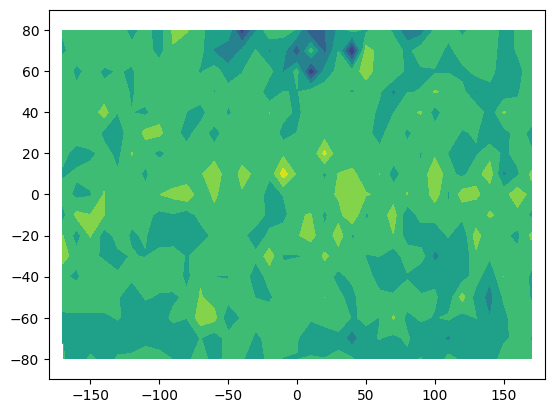

In [80]:
plt.contourf(xi,yi,ch4_interpo[0])

In [104]:
import numpy as np
from scipy.interpolate import griddata

# assume you have the following arrays:
# lat = array of latitudes for the target data
# lon = array of longitudes for the target data
# ch4 = array of ch4 target values for the target data
# lat_interp = array of latitudes for the interpolation points
# lon_interp = array of longitudes for the interpolation points
ds = xr.open_dataset("MIPAS-E_IMK.200502.V8R_CH4_261.nc")
lat = ds.latitude.values
lon = ds.longitude.values
lat_interp = np.linspace(-90, 90, 10)#np.linspace(-90, 90, 19)
lon_interp = np.linspace(-180, 180, 19)#np.linspace(-180, 180, 37)
ch4_interp = np.zeros((len(ds.altitude), len(lat_interp), len(lon_interp)))

# precompute the grid points for interpolation
xi, yi = np.meshgrid(lon_interp, lat_interp)

for i, alt in enumerate(ds.altitude.values):
    ch4 = ds.target.values[i, :]

    # interpolate the target values at the grid points using cubic interpolation
    zi = griddata((lon.ravel(), lat.ravel()), ch4.ravel(), (xi, yi), method='cubic')

    # where there are no ch4 target points, set the interpolated value to NaN
    zi[np.isnan(zi)] = np.nan

    # reshape the interpolated values to a 2D array
    ch4_interp[i, :, :] = zi.reshape(len(lat_interp), len(lon_interp))


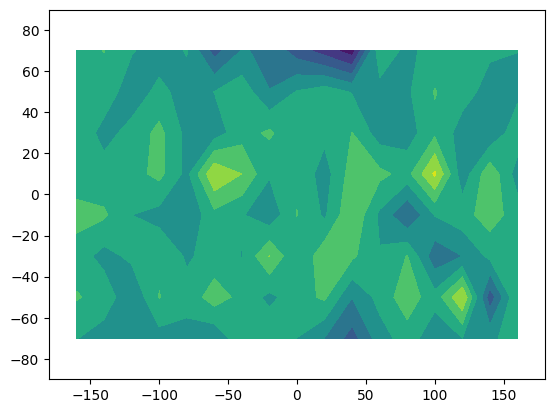

In [105]:
plt.contourf(xi,yi,ch4_interp[0])

In [106]:
import xarray as xr

# create an xarray dataset with the interpolated ch4 data
ds_interp = xr.Dataset(
    {'ch4': (['altitude', 'latitude', 'longitude'], ch4_interp)},
    coords={
        'altitude': ds.altitude,
        'latitude': lat_interp,
        'longitude': lon_interp,
    }
)

# add metadata to the dataset
ds_interp.ch4.attrs['standard_name'] = 'mass_fraction_of_methane_in_air'
ds_interp.ch4.attrs['long_name'] = 'Methane Concentration'
ds_interp.ch4.attrs['units'] = ds.target.units

# write the dataset to a netCDF file
ds_interp.to_netcdf('ch4_interp.nc', mode='w', format='NETCDF4_CLASSIC')


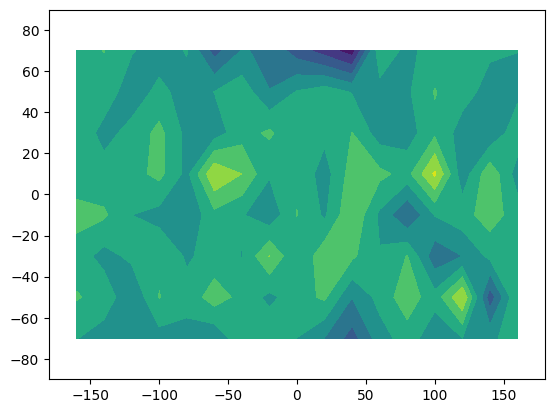

In [107]:

plt.contourf(xi,yi,ch4_interp[0])

In [103]:
np.linspace(-90, 90, 10)

array([-90., -70., -50., -30., -10.,  10.,  30.,  50.,  70.,  90.])

In [109]:
import numpy as np

# create empty arrays for the binned values
ch4_binned = np.empty((len(ds.altitude), len(lat_interp), len(lon_interp)))

# iterate over the latitude and longitude grids and bin the target values to the altitude grid
for i, lat in enumerate(lat_interp):
    for j, lon in enumerate(lon_interp):
        # find the indices of the target values that fall within the latitude and longitude range
        idx = np.where((ds.latitude == lat) & (ds.longitude == lon))[0]

        if len(idx) > 0:
            # bin the target values to the altitude grid
            ch4_binned[:, i, j], _ = np.histogram(ds.altitude, bins=len(ds.altitude), range=(ds.altitude[0], ds.altitude[-1]), weights=ds.target[idx])
        else:
            # set the binned values to NaN if there are no target values in the latitude and longitude range
            ch4_binned[:, i, j] = np.nan


[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

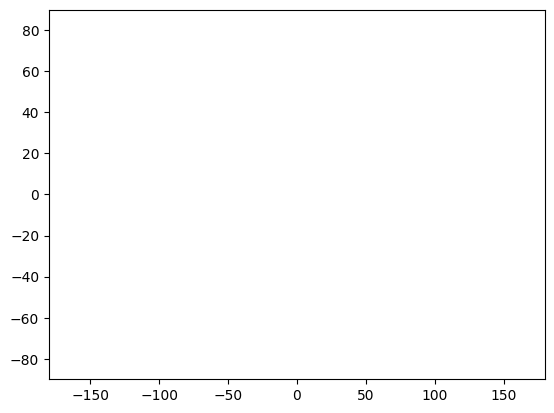

In [118]:
print(ch4_binned)
plt.contourf(xi,yi,ch4_binned[10])

In [147]:
import numpy as np
import xarray as xr

# Load the dataset
ds = xr.open_dataset("MIPAS-E_IMK.200502.V8R_CH4_261.nc")

# extract the monthly timestamp from the original dataset
monthly_time = ds.time.resample(time="1M").mean().values

# Define the bin edges for latitude and longitude
lat_bins = np.linspace(-90, 90, 19)
lon_bins = np.linspace(-180, 180, 37)

# Bin the latitude and longitude values
lat_indices = np.digitize(ds.latitude.values, lat_bins)
lon_indices = np.digitize(ds.longitude.values, lon_bins)

# Initialize an empty array to store the binned CH4 values
n_altitudes = ds.target.shape[0]
n_lats = len(lat_bins) - 1
n_lons = len(lon_bins) - 1
n_time = 1
ch4_binned = np.empty((n_altitudes, n_lats, n_lons, n_time))
ch4_binned[:] = np.nan

# Loop over altitudes and fill in the binned CH4 values
for alt_idx in range(n_altitudes):
    ch4_alt = ds.target.values[alt_idx]
    for lat_idx in range(n_lats):
        for lon_idx in range(n_lons):
            mask = (lat_indices == lat_idx+1) & (lon_indices == lon_idx+1)
            ch4_binned[alt_idx, lat_idx, lon_idx, 0] = np.nanmean(ch4_alt[mask])

# Create a new xarray dataset with the binned CH4 values
ds_binned = xr.Dataset(
    {"ch4": (["altitude", "latitude", "longitude", "time"], ch4_binned)},
    coords={
        "altitude": ds.altitude.values,
        "latitude": lat_bins[:-1] + np.diff(lat_bins)/2,
        "longitude": lon_bins[:-1] + np.diff(lon_bins)/2,
        "time": monthly_time
    },
    attrs=ds.attrs,
)

# Write the binned dataset to a netCDF file with CF metadata conventions
ds_binned.to_netcdf("MIPAS-E_IMK.200502.V8R_CH4_261_binned.nc", format="NETCDF4_CLASSIC")
